In [278]:
# importing required libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings;
warnings.filterwarnings('ignore');

In [279]:
#load the dataset
data = pd.read_csv('YourCabs.csv')


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [281]:
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

In [282]:
data['Car_Cancellation'].value_counts()

0    40299
1     3132
Name: Car_Cancellation, dtype: int64

### with the above shell we can conclude that the dataset has class imbalance

In [283]:
print("total vehicle model types: ",data['vehicle_model_id'].nunique())
(data['vehicle_model_id'].value_counts(normalize=True) * 100).round(2)


total vehicle model types:  27


12    73.36
85     5.54
89     5.51
65     4.40
28     3.92
24     3.44
87     1.30
90     0.72
23     0.68
86     0.28
10     0.24
64     0.20
54     0.17
17     0.09
91     0.06
30     0.03
36     0.02
13     0.02
72     0.00
1      0.00
43     0.00
14     0.00
69     0.00
76     0.00
75     0.00
70     0.00
39     0.00
Name: vehicle_model_id, dtype: float64

-->As the vehicle model of car are from model_id = 12 which is more than 70% of data so its not useful for our model it makes model bias<br>
-->similiarly id is unique which doesn't make sense for ML models<br>
-> user_id is a personal identifier so we can not use it for ML models


In [284]:
print("total travel_type: ",data['travel_type_id'].nunique())
data['travel_type_id'].value_counts()

total travel_type:  3


2    34292
3     7550
1     1589
Name: travel_type_id, dtype: int64

##  spliting into three parts on bases of travel_type_id <br>
Spliting is done  due to  some features are always zero for some travel_type_id in order make model to predict more correctly

In [285]:
data_id1 = data.query('travel_type_id ==1')
data_id1.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,132760,22310,87,NaN,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [286]:
data_id2 = data.query('travel_type_id ==2')
data_id2.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [287]:
data_id3 = data.query('travel_type_id ==3')
data_id3.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,132552,22201,12,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,132569,15846,12,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


# Data Preprocessing of travel_type_id ==1 <br>
### Drop the unnecessary features from dataset
id --> unique vlaue can not be used for Machine Learning models ,<br>
user_id --> PII can not be used for Machine Learning models <br>
vehicle_model_id --> more than 75% data is of model ==12 so it will make model bais, so not be used for Machine Learning models<br>
package_id --> travel_type_id ==1 is used for Long distance travel so there in no data for the packages its only in case of travel_type_id==3 <br>
travel_type_id --> travel_type_id now have only one value (1) so there is no need of this feature.<br>
--> the rest which are discarded dont have any relation with the travel_type_id ==1 


In [288]:
#Removing the extra features
df_id1 = data_id1.drop(['id','user_id','vehicle_model_id','package_id','travel_type_id','to_area_id','from_lat','from_long','to_lat','to_long'], axis=1)

In [289]:
df_id1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1589 entries, 6 to 43407
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         1501 non-null   float64
 1   from_city_id         1393 non-null   float64
 2   to_city_id           1588 non-null   float64
 3   from_date            1589 non-null   object 
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   booking_created      1589 non-null   object 
 7   Car_Cancellation     1589 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 111.7+ KB


In [290]:
df_id1.isnull().sum()

from_area_id            88
from_city_id           196
to_city_id               1
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
Car_Cancellation         0
dtype: int64

## handling missing values in the dataset <br>
"from_area_id", "from_city_id", "to_city_id"  coulmns have some missing values...<br>
All three features are "categorical" data so missing values will be filled with mode values<br>



In [291]:
# calculating mode values for each feature
from_area_id_mode_value = df_id1['from_area_id'].mode()[0]
from_city_id_mode_value = df_id1['from_city_id'].mode()[0]
to_city_id_mode_value = df_id1['to_city_id'].mode()[0]

# Fill missing values with the mode
df_id1['from_area_id'] = df_id1['from_area_id'].fillna(from_area_id_mode_value)
df_id1['from_city_id'] = df_id1['from_city_id'].fillna(from_city_id_mode_value)
df_id1['to_city_id'] = df_id1['to_city_id'].fillna(to_city_id_mode_value)


In [292]:
df_id1.isnull().sum()

from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
Car_Cancellation       0
dtype: int64

## Feature Engineering <br>
 from_area_id ,from_city_id, to_city_id these have more on seven categories of data so directly we can not use it. <br> 
we can use them in order to make it more efficient we will convert them into some other format. <br> eg:calculate the cancelation percentage and then categories them into 4 categories zero, low , medium , high

In [293]:
df_id1['from_area_id'].value_counts()

393.0     345
571.0      98
585.0      47
142.0      44
293.0      32
         ... 
727.0       1
1299.0      1
1283.0      1
398.0       1
1180.0      1
Name: from_area_id, Length: 297, dtype: int64

In [294]:
# Calculate cancellation percentage for each from_area_id
cancel_pct = df_id1.groupby('from_area_id')['Car_Cancellation'].mean()

# Define the categories and their corresponding cancellation percentage ranges
categories = ['zero', 'low', 'medium', 'high']
ranges = [(0, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1.0)]

# Create a new column that categorizes each from_area_id
df_id1['from_area_id_cancelation'] = df_id1['from_area_id'].map(lambda x: 
    next((cat for cat, (low, high) in zip(categories, ranges) if low <= cancel_pct[x] <= high), 'unknown')
)

In [295]:
df_id1['from_area_id_cancelation'].value_counts()

zero      1536
low         44
medium       9
Name: from_area_id_cancelation, dtype: int64

In [296]:
# Calculate cancellation percentage for each from_cit_id
cancel_pct = df_id1.groupby('from_city_id')['Car_Cancellation'].mean()

# Define the categories and their corresponding cancellation percentage ranges
categories = ['zero', 'low', 'medium', 'high']
ranges = [(0, 0.0), (0.01, 0.05), (0.05, 0.1), (0.6, 1.0)]

# Create a new column that categorizes each from_city_id
df_id1['from_city_id_cancelation'] = df_id1['from_city_id'].map(lambda x: 
    next((cat for cat, (low, high) in zip(categories, ranges) if low <= cancel_pct[x] <= high), 'unknown')
)

In [297]:
df_id1['from_city_id_cancelation'].value_counts()

low     1477
zero     112
Name: from_city_id_cancelation, dtype: int64

In [298]:

cancel_pct = df_id1.groupby('to_city_id')['Car_Cancellation'].mean()

categories = ['zero', 'low', 'medium', 'high']
ranges = [(0, 0.0), (0.01, 0.05), (0.05, 0.1), (0.6, 1.0)]


df_id1['fto_city_id_cancelation'] = df_id1['to_city_id'].map(lambda x: 
    next((cat for cat, (low, high) in zip(categories, ranges) if low <= cancel_pct[x] <= high), 'unknown')
)

In [299]:
df_id1

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_id_cancelation,from_city_id_cancelation,fto_city_id_cancelation
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,zero,low,low
17,1383.0,15.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,zero,low,low
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,zero,low,low
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,zero,zero,zero
216,1118.0,15.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,zero,low,low
...,...,...,...,...,...,...,...,...,...,...,...
43342,393.0,15.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,0,zero,low,medium
43385,119.0,15.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,0,zero,low,low
43386,1281.0,15.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,0,zero,low,low
43393,393.0,15.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,0,zero,low,zero


#  Calculating the time difference between booking_created and from_date

In [300]:
def parse_date(date_str):
    for fmt in ('%m/%d/%Y %H:%M', '%m-%d-%Y %H:%M'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    raise ValueError(f"Date format for {date_str} not recognized")

# Convert date columns to datetime format using the custom function
df_id1['from_date'] = df_id1['from_date'].apply(parse_date)
df_id1['booking_created'] = df_id1['booking_created'].apply(parse_date)

# Calculate time difference between from_date and booking_created
df_id1['time_diff'] = df_id1['from_date'] - df_id1['booking_created']

df_id1['time_diff_seconds'] = df_id1['time_diff'].dt.total_seconds()

In [301]:

# Extract hour of the day
df_id1['hour'] = df_id1['from_date'].dt.hour

# Categorize hour into parts of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df_id1['time_of_day'] = df_id1['hour'].apply(categorize_hour)

# Extract day of the week
df_id1['day_of_week'] = df_id1['from_date'].dt.day_name()

# Categorize into weekend or weekday
df_id1['is_weekend'] = df_id1['from_date'].dt.weekday >= 5

# Convert boolean to string for easier interpretation
df_id1['is_weekend'] = df_id1['is_weekend'].apply(lambda x: 'weekend' if x else 'weekday')





# Label encoding <br> 
 for the columns day_of_time, day_of_week, is_weekend <br><br>
### 'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3 <br>
###  'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6 <br>
###   'weekday': 0, 'weekend': 1
###  'zero': 0, 'low': 1,'medium': 2, 'high': 3

In [302]:
time_of_day_mapping = {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}
df_id1['time_of_day'] = df_id1['time_of_day'].map(time_of_day_mapping)

# Map day_of_week to integers
day_of_week_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_id1['day_of_week'] = df_id1['day_of_week'].map(day_of_week_mapping)

# Map is_weekend to integers
is_weekend_mapping = {'weekday': 0, 'weekend': 1}
df_id1['is_weekend'] = df_id1['is_weekend'].map(is_weekend_mapping)


#Map  from_area_id_cancelation to Integers
from_area_id_cancelation_mapping = {'zero': 0, 'low': 1,'medium': 2, 'high': 3}
df_id1['from_area_id_cancelation'] = df_id1['from_area_id_cancelation'].map(from_area_id_cancelation_mapping)

#Map  from_city_id_cancelation to Integers
from_city_id_cancelation_mapping = {'zero': 0, 'low': 1,'medium': 2, 'high': 3}
df_id1['from_city_id_cancelation'] = df_id1['from_city_id_cancelation'].map(from_city_id_cancelation_mapping)

#Map  fto_city_id_cancelation to Integers
fto_city_id_cancelation_mapping = {'zero': 0, 'low': 1,'medium': 2, 'high': 3}
df_id1['fto_city_id_cancelation'] = df_id1['fto_city_id_cancelation'].map(fto_city_id_cancelation_mapping)


In [303]:
df_id1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_id_cancelation,from_city_id_cancelation,fto_city_id_cancelation,time_diff,time_diff_seconds,hour,time_of_day,day_of_week,is_weekend
6,571.0,15.0,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,0,0,1,1,0 days 00:24:00,1440.0,9,0,1,0
17,1383.0,15.0,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,0,0,1,1,10 days 19:43:00,934980.0,8,0,5,1
24,515.0,15.0,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,0,0,1,1,3 days 17:50:00,323400.0,8,0,5,1
158,136.0,1.0,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,0,0,0,0,0 days 21:11:00,76260.0,9,0,4,0
216,1118.0,15.0,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,0,0,1,1,1 days 21:58:00,165480.0,7,0,6,1


In [304]:
#Dropinag the irrelevant columns
df_id1.drop(columns=['from_area_id', 'from_city_id','to_city_id','from_date','booking_created','time_diff','hour'], axis =1 , inplace =True)

<Axes: >

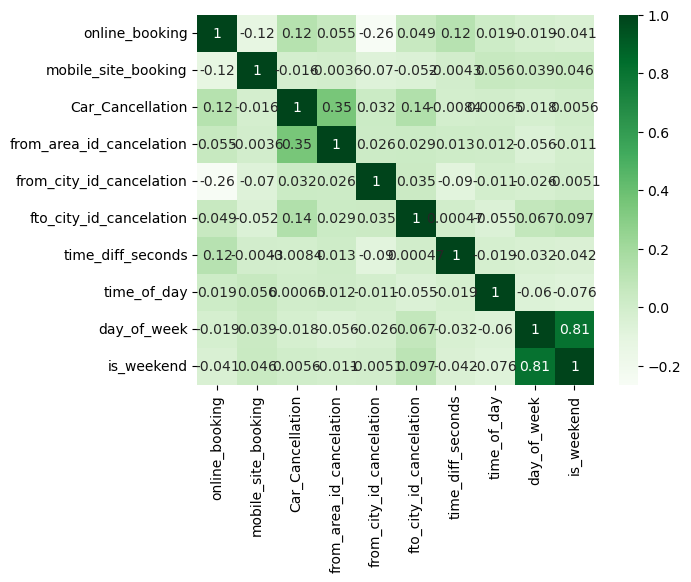

In [305]:
sns.heatmap(df_id1.corr(), annot = True, cmap = 'Greens')

In [306]:
# Droping the is_weekend column because it is highly correlated with target
df_id1.drop(columns=['is_weekend'], axis =1, inplace =True)

In [307]:
X = df_id1.drop(columns=['Car_Cancellation'])  # Drop the target column
y = df_id1['Car_Cancellation']  # Target column
df_id1['Car_Cancellation'].value_counts()


0    1568
1      21
Name: Car_Cancellation, dtype: int64

## Oversampling the rare class (1), beacuse the dataset is less

In [308]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)



In [309]:
# Spliting data into training samples and testing samples
X_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=32)

In [310]:
# Standardize beachuse of some features has higher values as compared to other features
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
x_test = standard_Scaler.transform(x_test)

In [311]:
# load the losgistics regression Model
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [312]:
y_pred=log_reg.predict(x_test)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[259,  57],
       [ 33, 279]], dtype=int64)

<Axes: >

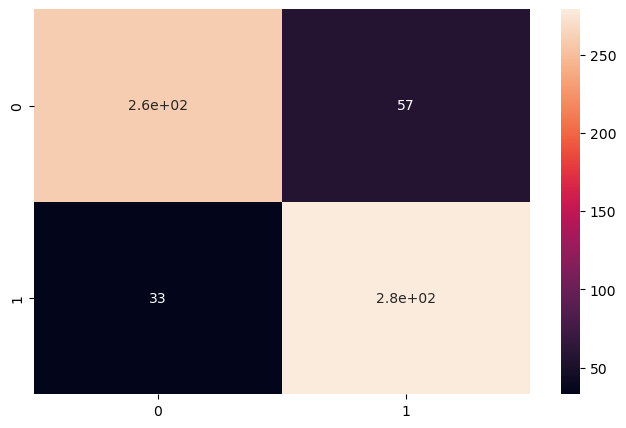

In [313]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

In [314]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy:  0.856687898089172
Precision:  0.8303571428571429
Recall:  0.8942307692307693

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       316
           1       0.83      0.89      0.86       312

    accuracy                           0.86       628
   macro avg       0.86      0.86      0.86       628
weighted avg       0.86      0.86      0.86       628



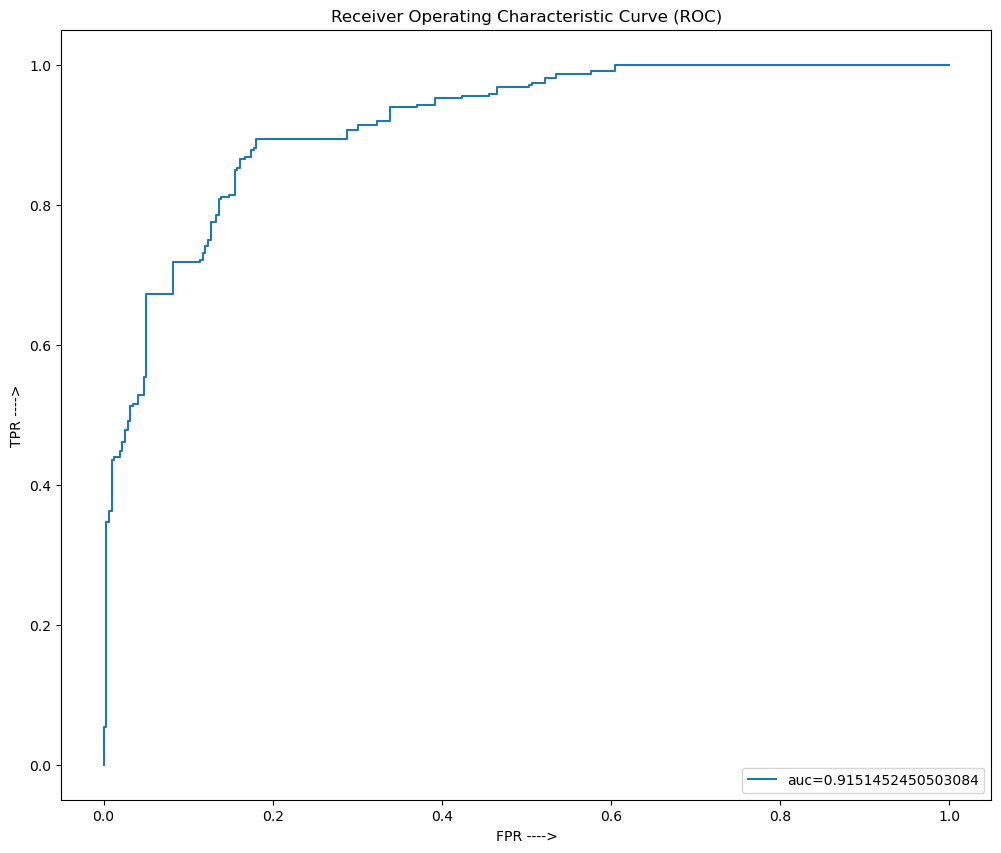

In [315]:
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# Apply RandomForest on preprocessed data of travel_type_id ==1

In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [318]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier( random_state=42)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       324
           1       0.92      0.97      0.95       304

    accuracy                           0.95       628
   macro avg       0.95      0.95      0.95       628
weighted avg       0.95      0.95      0.95       628



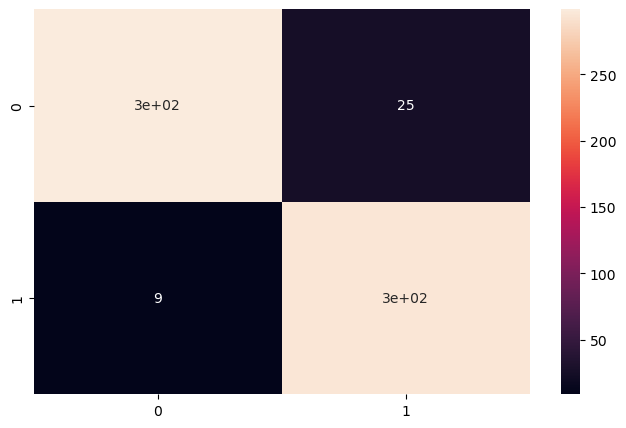

In [319]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)



con = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(con, annot = True, ax=ax)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))



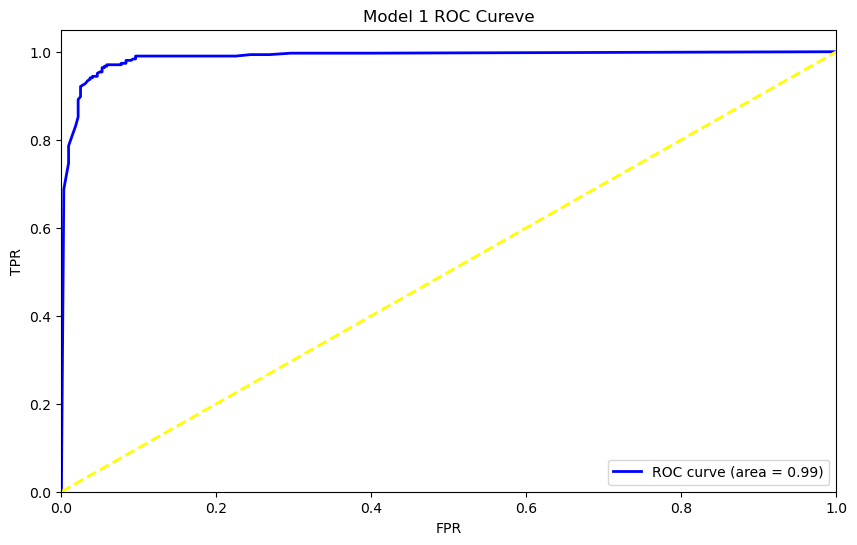

In [320]:




y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='Blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model 1 ROC Cureve')
plt.legend(loc=4)
plt.show()



#  ML Model 3 (travel_type_id ==3)
# Data Preprocessing of travel_type_id ==3 <br>
### Drop the unnecessary features from dataset
id --> unique vlaue can not be used for Machine Learning models ,<br>
user_id --> PII can not be used for Machine Learning models <br>
vehicle_model_id --> more than 75% data is of model ==12 so it will make model bais, so not be used for Machine Learning models<br>
travel_type_id --> travel_type_id now have only one value (1) so there is no need of this feature.<br>
--> the rest which are discarded dont have any relation with the travel_type_id ==3

In [321]:
#Removing the extra features
df_id3 = data_id3.drop(['id','user_id','vehicle_model_id','travel_type_id','to_area_id','from_city_id','to_city_id','from_lat','from_long','to_lat','to_long'], axis=1)
df_id3

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0
...,...,...,...,...,...,...,...
43415,1.0,768.0,11/24/2013 16:00,0,1,11/24/2013 12:32,0
43417,4.0,1390.0,11/24/2013 15:00,0,0,11/24/2013 13:06,0
43420,2.0,1237.0,11/25/2013 1:00,1,0,11/24/2013 13:54,0
43424,2.0,515.0,11/24/2013 15:15,0,0,11/24/2013 14:23,0


In [322]:
df_id3['package_id'].value_counts()

1.0    3503
2.0    2651
6.0     502
4.0     412
3.0     375
7.0     101
5.0       6
Name: package_id, dtype: int64

## Feature conversion  for Model 3<br>
 from_area_id have more on seven categories of data so directly we can not use it. <br> 
we can use them in order to make it more efficient we will convert them into some other format. <br> eg:calculate the cancelation percentage and then categories them into 4 categories zero, low , medium , high

In [323]:

# Calculate cancellation percentage for each from_area_id
cancel_pct = df_id3.groupby('from_area_id')['Car_Cancellation'].mean()

# Define the categories and their corresponding cancellation percentage ranges
categories = ['zero', 'low', 'medium', 'high']
ranges = [(0,0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1.0)]

# Create a new column that categorizes each from_area_id
df_id3['from_area_id_cancelation'] = df_id3['from_area_id'].map(lambda x: 
    next((cat for cat, (low, high) in zip(categories, ranges) if low <= cancel_pct[x] <= high), 'unknown')
)

In [324]:
df_id3['from_area_id_cancelation'].value_counts()

zero      6749
low        749
medium      49
high         3
Name: from_area_id_cancelation, dtype: int64

In [325]:
df_id3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_id_cancelation
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0,low
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0,low
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0,zero
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0,low
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0,zero


#  Calculating the time difference between booking_created and from_date

In [326]:
def parse_date(date_str):
    for fmt in ('%m/%d/%Y %H:%M', '%m-%d-%Y %H:%M'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    raise ValueError(f"Date format for {date_str} not recognized")

# Convert date columns to datetime format using the custom function
df_id3['from_date'] = df_id3['from_date'].apply(parse_date)
df_id3['booking_created'] = df_id3['booking_created'].apply(parse_date)

# Calculate time difference between from_date and booking_created
df_id3['time_diff'] = df_id3['from_date'] - df_id3['booking_created']

In [327]:
df_id3['time_diff_seconds'] = df_id3['time_diff'].dt.total_seconds()

In [328]:
# Extract hour of the day
df_id3['hour'] = df_id3['from_date'].dt.hour

# Categorize hour into parts of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df_id3['time_of_day'] = df_id3['hour'].apply(categorize_hour)

# Extract day of the week
df_id3['day_of_week'] = df_id3['from_date'].dt.day_name()

# Categorize into weekend or weekday
df_id3['is_weekend'] = df_id3['from_date'].dt.weekday >= 5

# Convert boolean to string for easier interpretation
df_id3['is_weekend'] = df_id3['is_weekend'].apply(lambda x: 'weekend' if x else 'weekday')

In [329]:
df_id3.head()

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_area_id_cancelation,time_diff,time_diff_seconds,hour,time_of_day,day_of_week,is_weekend
8,2.0,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,0,low,0 days 06:16:00,22560.0,16,afternoon,Tuesday,weekday
20,2.0,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,0,low,0 days 01:38:00,5880.0,14,afternoon,Tuesday,weekday
23,1.0,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,0,zero,0 days 01:51:00,6660.0,16,afternoon,Tuesday,weekday
34,1.0,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,0,low,0 days 02:35:00,9300.0,20,evening,Tuesday,weekday
47,2.0,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,0,zero,0 days 07:23:00,26580.0,3,night,Wednesday,weekday


In [330]:
df_id3.drop(columns = ['hour','booking_created','from_area_id','from_date','time_diff'],axis =1 ,inplace =True)

# Label encoding  travel_type_id ==3<br> 
 for the columns day_of_time, day_of_week, is_weekend <br><br>
### 'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3 <br>
###  'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6 <br>
###   'weekday': 0, 'weekend': 1
###  'zero': 0, 'low': 1,'medium': 2, 'high': 3

In [331]:
time_of_day_mapping = {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}
df_id3['time_of_day'] = df_id3['time_of_day'].map(time_of_day_mapping)

# Map day_of_week to integers
day_of_week_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_id3['day_of_week'] = df_id3['day_of_week'].map(day_of_week_mapping)

# Map is_weekend to integers
is_weekend_mapping = {'weekday': 0, 'weekend': 1}
df_id3['is_weekend'] = df_id3['is_weekend'].map(is_weekend_mapping)


#Map  from_area_id_cancelation to Integers
from_area_id_cancelation_mapping = {'zero': 0, 'low': 1,'medium': 2, 'high': 3}
df_id3['from_area_id_cancelation'] = df_id3['from_area_id_cancelation'].map(from_area_id_cancelation_mapping)




In [332]:
df_id3.head()

,package_id,online_booking,mobile_site_booking,Car_Cancellation,from_area_id_cancelation,time_diff_seconds,time_of_day,day_of_week,is_weekend
8,2.0,0,0,0,1,22560.0,1,1,0
20,2.0,0,0,0,1,5880.0,1,1,0
23,1.0,0,0,0,0,6660.0,1,1,0
34,1.0,1,0,0,1,9300.0,2,1,0
47,2.0,0,0,0,0,26580.0,3,2,0


<Axes: >

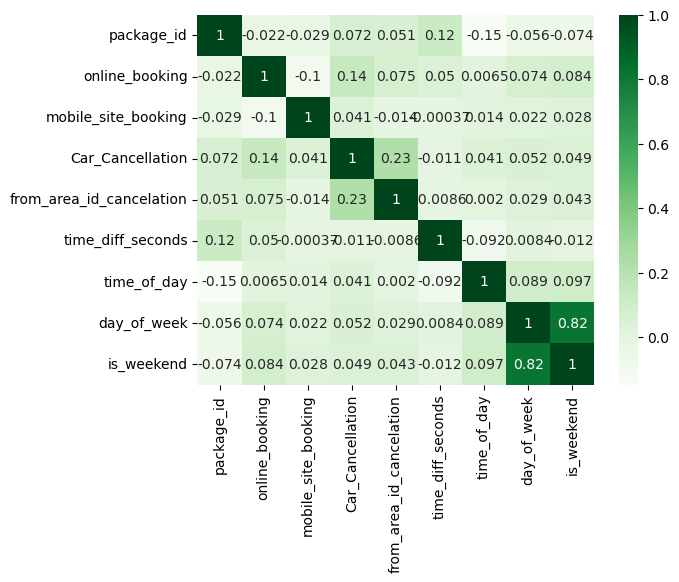

In [333]:
sns.heatmap(df_id3.corr(), annot =True, cmap ='Greens')

In [334]:
df_id3.drop(columns =['is_weekend'], axis =1 , inplace =True)

In [335]:
# spliting data into features and target variable and Handling the class imbalance
from imblearn.over_sampling import SMOTE

X_id3 = df_id3.drop(columns=['Car_Cancellation'])  # Drop the target column
y_id3 = df_id3['Car_Cancellation']  # Target column

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_id3, y_id3)

In [336]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier( random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1446
           1       0.93      0.95      0.94      1440

    accuracy                           0.94      2886
   macro avg       0.94      0.94      0.94      2886
weighted avg       0.94      0.94      0.94      2886



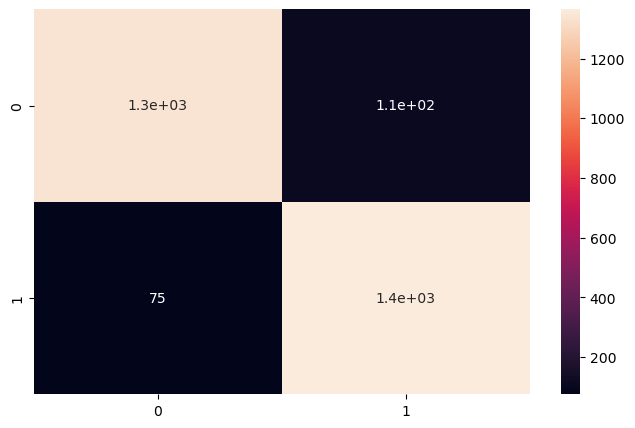

In [337]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)



con = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(con, annot = True, ax=ax)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


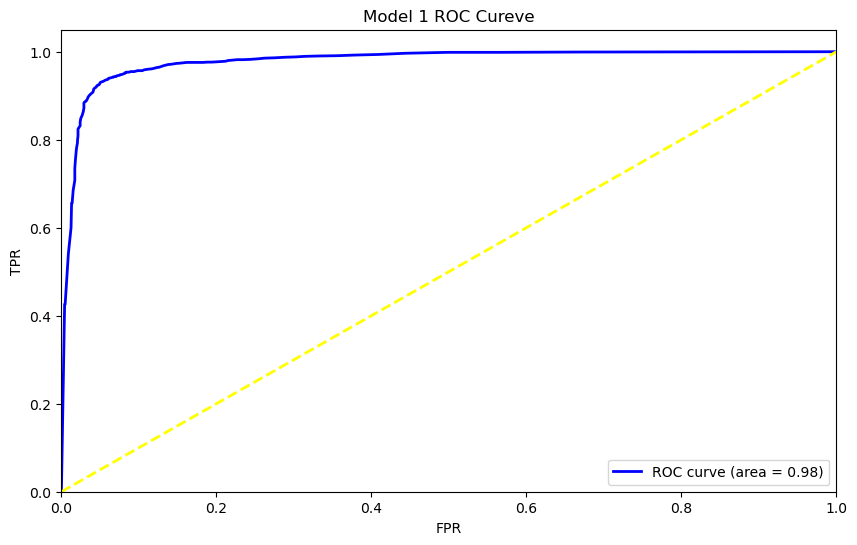

In [338]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='Blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model 1 ROC Cureve')
plt.legend(loc=4)
plt.show()

# ML Model 2  (travel_type_id ==2)


In [339]:
data_id2.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [340]:
data_id2.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [341]:
#Removing the extra features
df_id2 = data_id2.drop(['id','user_id','vehicle_model_id','package_id','travel_type_id','from_city_id','to_city_id'], axis=1)
df_id2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [342]:
# Calculate cancellation percentage
cancel_pct = df_id2.groupby('from_area_id')['Car_Cancellation'].mean()


# Define the categories and their corresponding cancellation percentage ranges
categories = ['zero', 'low', 'medium', 'high']
ranges = [(0, 0.1), (0.1, 0.3), (0.3, 0.6), (0.6, 1.0)]

# Create a new column that categorizes each from_area_id
df_id2['from_area_id_cancelation'] = df_id2['from_area_id'].map(lambda x: 
next((cat for cat, (low, high) in zip(categories, ranges) if low <= cancel_pct[x] <= high), 'unknown')
)


In [343]:
cancel_pct = df_id2.groupby('to_area_id')['Car_Cancellation'].mean()

df_id2['to_area_id_cancelation'] = df_id2['to_area_id'].map(lambda x: 
    next((cat for cat, (low, high) in zip(categories, ranges) if low <= cancel_pct[x] <= high), 'unknown')
    )

In [344]:
df_id2.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_area_id_cancelation,to_area_id_cancelation
0,83.0,448.0,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,low,zero
1,1010.0,540.0,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,zero,zero
2,1301.0,1034.0,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,zero,zero
3,768.0,398.0,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,zero,zero
4,1365.0,849.0,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,low,low


In [345]:
def parse_date(date_str):
    for fmt in ('%m/%d/%Y %H:%M', '%m-%d-%Y %H:%M'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    raise ValueError(f"Date format for {date_str} not recognized")

# Convert date columns to datetime format using the custom function
df_id2['from_date'] = df_id2['from_date'].apply(parse_date)
df_id2['booking_created'] = df_id2['booking_created'].apply(parse_date)

# Calculate time difference between from_date and booking_created
df_id2['time_diff'] = df_id2['from_date'] - df_id2['booking_created']

df_id2['time_diff_seconds'] = df_id2['time_diff'].dt.total_seconds()

In [346]:
# Extract hour of the day
df_id2['hour'] = df_id2['from_date'].dt.hour

# Categorize hour into parts of the day
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df_id2['time_of_day'] = df_id2['hour'].apply(categorize_hour)

# Extract day of the week
df_id2['day_of_week'] = df_id2['from_date'].dt.day_name()

# Categorize into weekend or weekday
df_id2['is_weekend'] = df_id2['from_date'].dt.weekday >= 5

# Convert boolean to string for easier interpretation
df_id2['is_weekend'] = df_id2['is_weekend'].apply(lambda x: 'weekend' if x else 'weekday')

## Label encoding for travel_type_id ==2

In [347]:
time_of_day_mapping = {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}
df_id2['time_of_day'] = df_id2['time_of_day'].map(time_of_day_mapping)

# Map day_of_week to integers
day_of_week_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df_id2['day_of_week'] = df_id2['day_of_week'].map(day_of_week_mapping)

# Map is_weekend to integers
is_weekend_mapping = {'weekday': 0, 'weekend': 1}
df_id2['is_weekend'] = df_id2['is_weekend'].map(is_weekend_mapping)


#Map  from_area_id_cancelation to Integers
from_area_id_cancelation_mapping = {'zero': 0, 'low': 1,'medium': 2, 'high': 3}
df_id2['from_area_id_cancelation'] = df_id2['from_area_id_cancelation'].map(from_area_id_cancelation_mapping)


from_area_id_cancelation_mapping = {'zero': 0, 'low': 1,'medium': 2, 'high': 3}
df_id2['to_area_id_cancelation'] = df_id2['to_area_id_cancelation'].map(from_area_id_cancelation_mapping)




In [348]:
# dropping columns that are not required for model training
df_id2.drop(columns = ['hour','booking_created','from_area_id','to_area_id','from_date','time_diff'],axis =1 ,inplace =True)

In [349]:
df_id2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_area_id_cancelation,to_area_id_cancelation,time_diff_seconds,time_of_day,day_of_week,is_weekend
0,0,0,12.924150,77.672290,12.927320,77.635750,0,1,0,1260.0,3,1,0
1,0,0,12.966910,77.749350,12.927680,77.626640,0,0,0,23700.0,0,1,0
2,0,0,12.937222,77.626915,13.047926,77.597766,0,0,0,1320.0,3,1,0
3,0,0,12.989990,77.553320,12.971430,77.639140,0,0,0,3960.0,0,1,0
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,1,4020.0,0,1,0


## Calculate the Distance between 2 different locations from coordinates using geopy library

In [350]:
from geopy.distance import geodesic
# Function to calculate distance using geopy
def calculate_distance(row):
    from_coords = (row['from_lat'], row['from_long'])
    to_coords = (row['to_lat'], row['to_long'])
    return geodesic(from_coords, to_coords).kilometers

# Apply the function to each row
df_id2['distance'] = df_id2.apply(calculate_distance, axis=1)

In [351]:
df_id2.head()

,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,from_area_id_cancelation,to_area_id_cancelation,time_diff_seconds,time_of_day,day_of_week,is_weekend,distance
0,0,0,12.924150,77.672290,12.927320,77.635750,0,1,0,1260.0,3,1,0,3.980687
1,0,0,12.966910,77.749350,12.927680,77.626640,0,0,0,23700.0,0,1,0,14.004432
2,0,0,12.937222,77.626915,13.047926,77.597766,0,0,0,1320.0,3,1,0,12.648909
3,0,0,12.989990,77.553320,12.971430,77.639140,0,0,0,3960.0,0,1,0,9.534596
4,0,0,12.845653,77.677925,12.954340,77.600720,0,1,1,4020.0,0,1,0,14.655467


In [352]:
#Droping the  coordinates columns as the distance is calculated
df_id2.drop(columns =['from_lat','from_long','to_lat','to_long'], axis =1, inplace=True)

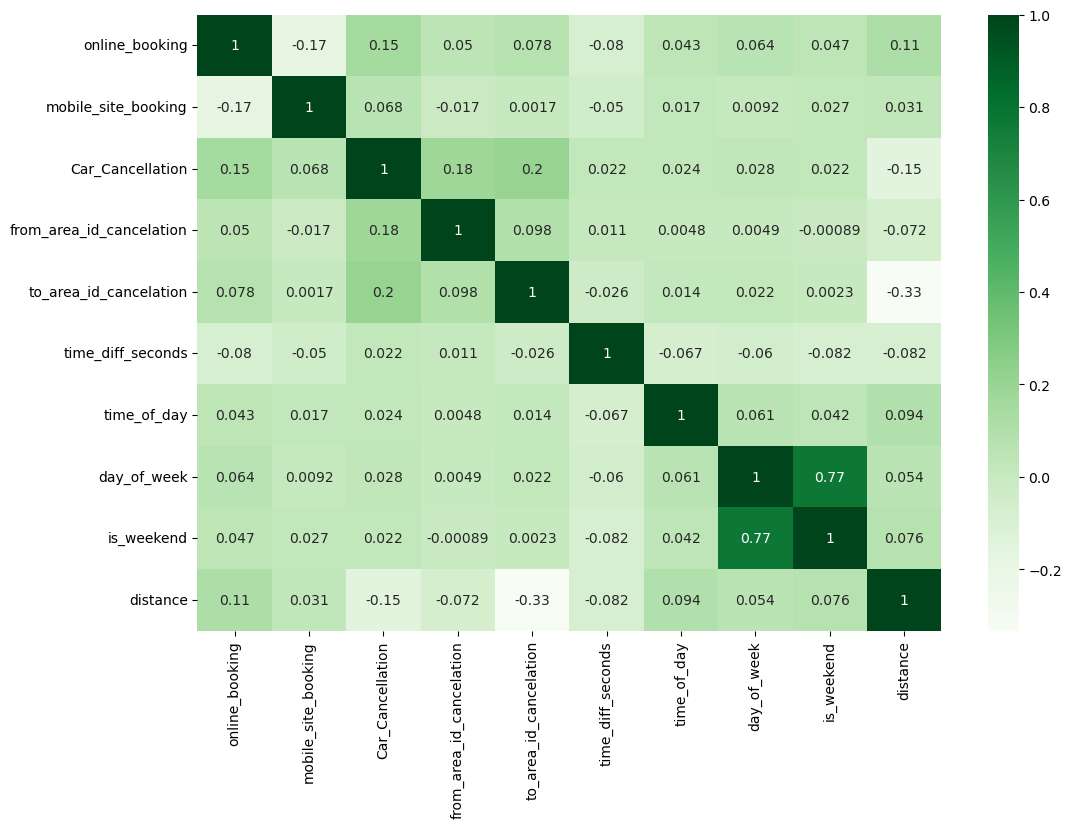

In [353]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_id2.corr(), annot =True, cmap ='Greens')
plt.show()

### corr matrix validates that there is no feature which is highly correlated with the target feature
# Over_sampling to handle class imbalance

In [354]:
# spliting data into features and target variable and Handling the class imbalance
from imblearn.over_sampling import SMOTE

X_id2 = df_id2.drop(columns=['Car_Cancellation'])  # Drop the target column
y_id2 = df_id2['Car_Cancellation']  # Target column

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_id2, y_id2)

In [355]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier( random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      6265
           1       0.84      0.89      0.86      6342

    accuracy                           0.86     12607
   macro avg       0.86      0.86      0.86     12607
weighted avg       0.86      0.86      0.86     12607



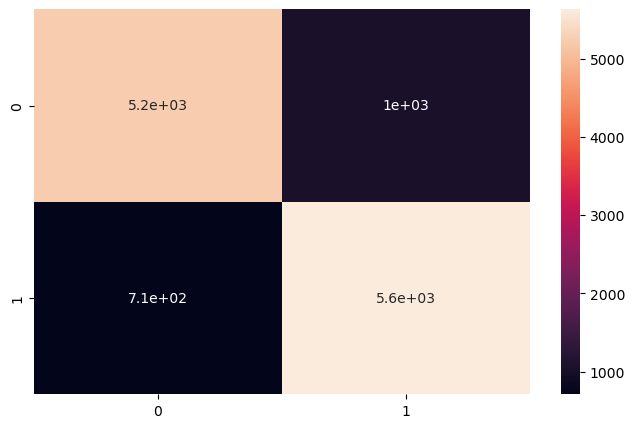

In [356]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)



con = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(con, annot = True, ax=ax)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

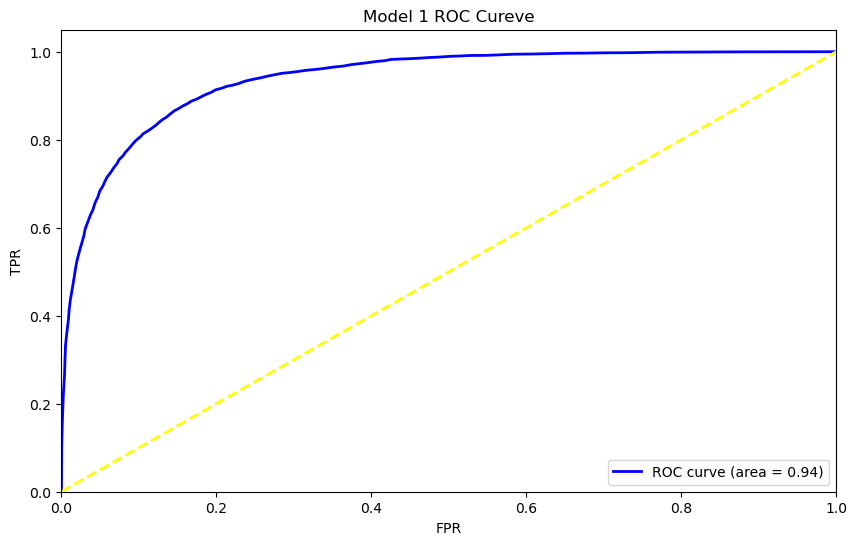

In [357]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='Blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='yellow', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Model 1 ROC Cureve')
plt.legend(loc=4)
plt.show()

# End of Porject